In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('D:/ML Projects/Car Price Prediction/CarPrice_Assignment.csv')

In [80]:
df.shape

(205, 26)

In [81]:
df.head().transpose()

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [82]:
cols = df.columns
cols

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [83]:
df[cols].dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [84]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [85]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [86]:
# converting symboling to categorical
df['symboling'] = df['symboling'].astype('object')

In [87]:
cont_Dataset = df.select_dtypes(include=['float64', 'int64'])
cont_Dataset.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
# dropping car_ID 
cont_Dataset = cont_Dataset.drop(['car_ID'], axis=1)
cont_Dataset.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


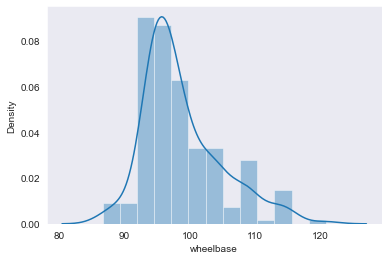

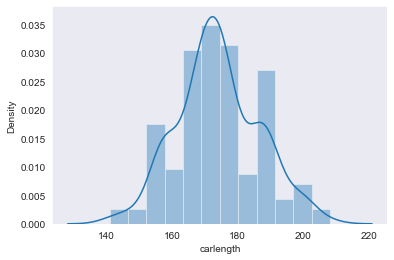

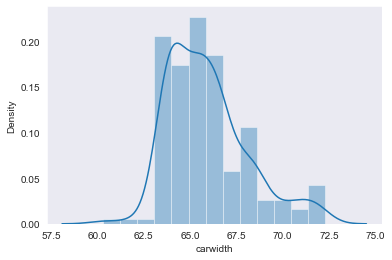

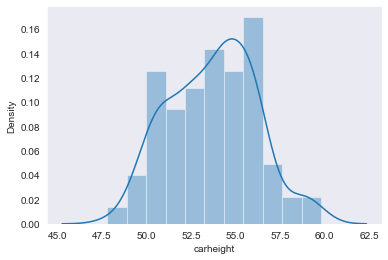

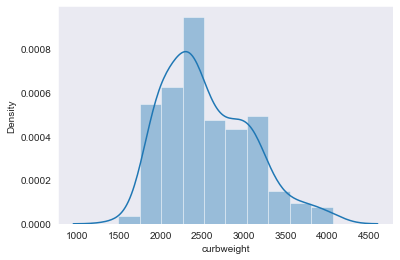

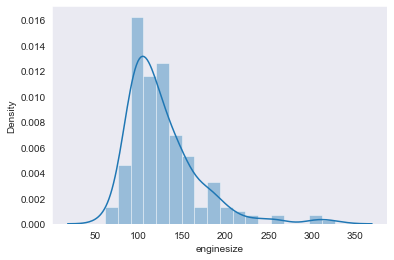

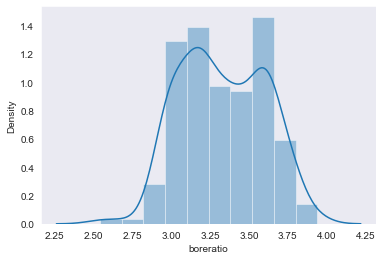

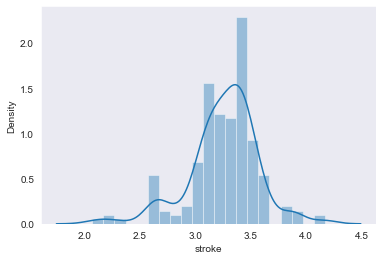

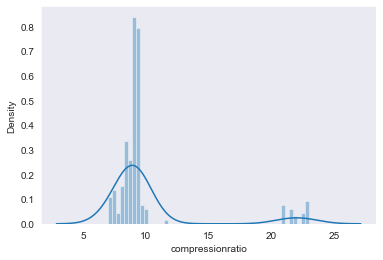

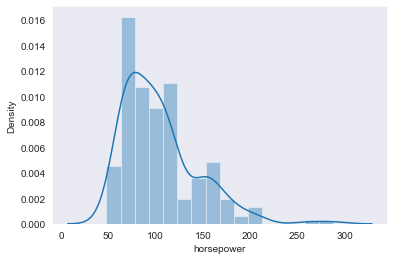

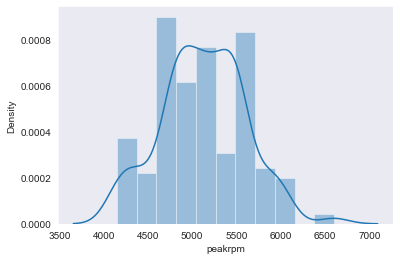

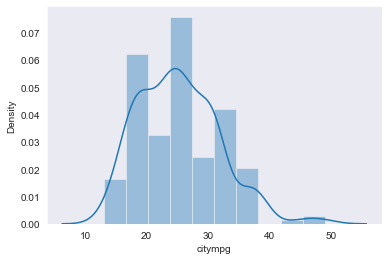

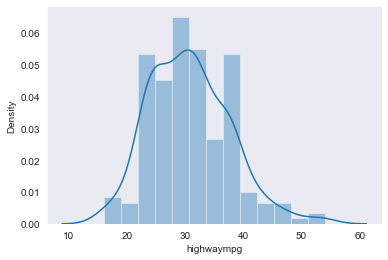

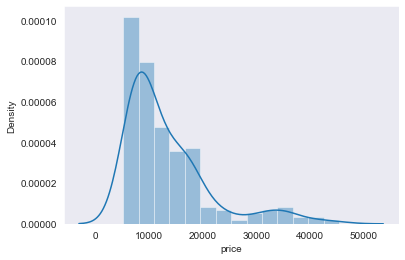

In [89]:
#cont_Dataset.hist(figsize=(20,10))
for column in cont_Dataset.columns:
    plt.figure()             
    sns.distplot(cont_Dataset[column])

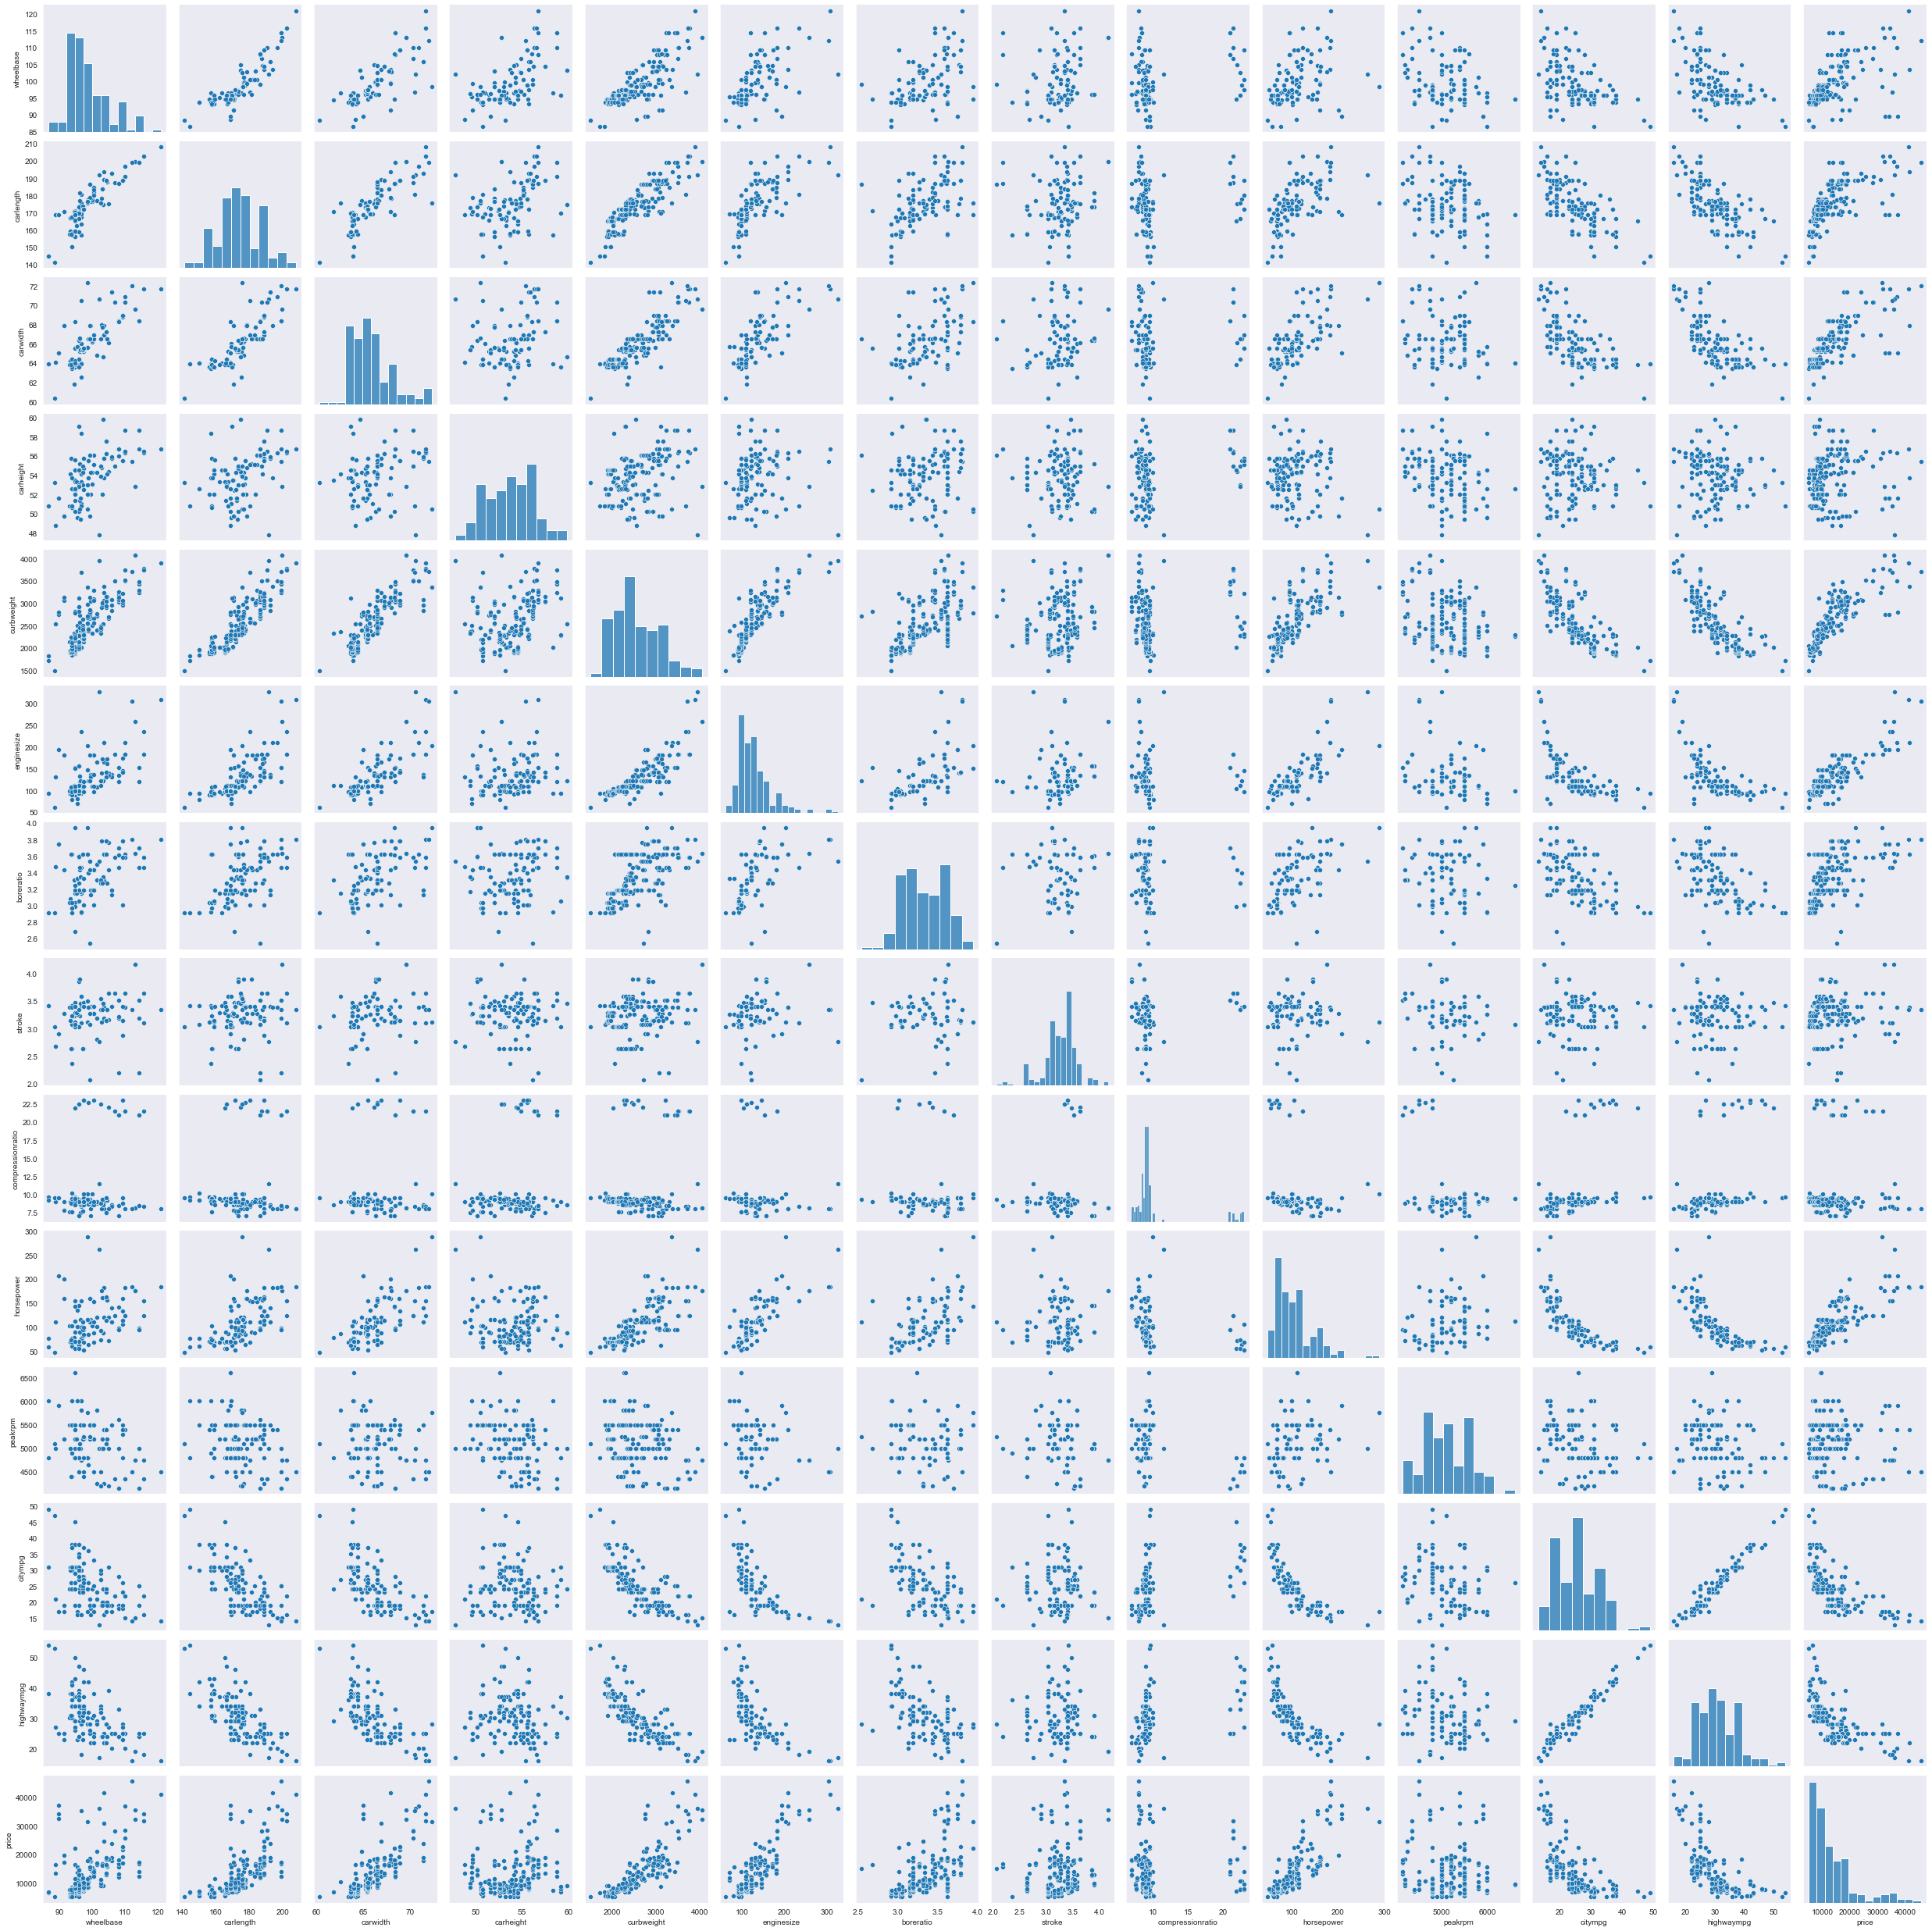

In [90]:
sns.pairplot(cont_Dataset)

<AxesSubplot:>

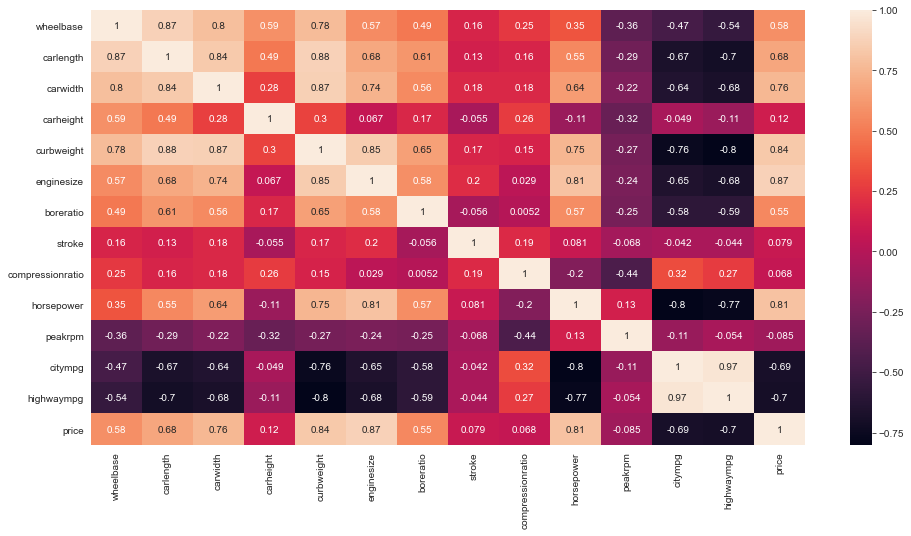

In [91]:
corr = cont_Dataset.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)


<AxesSubplot:>

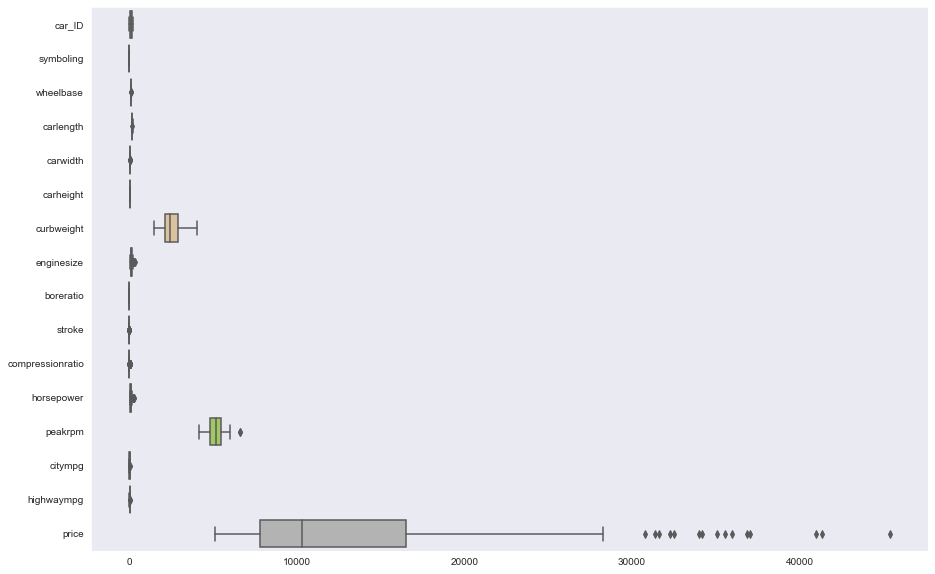

In [92]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="h", palette="Set2")

In [93]:
cont_Dataset.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


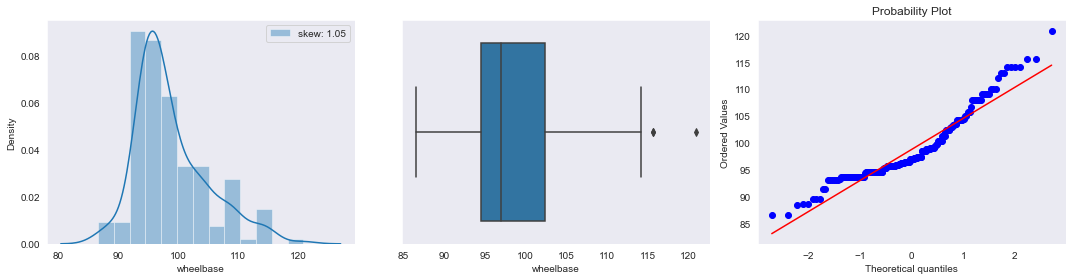

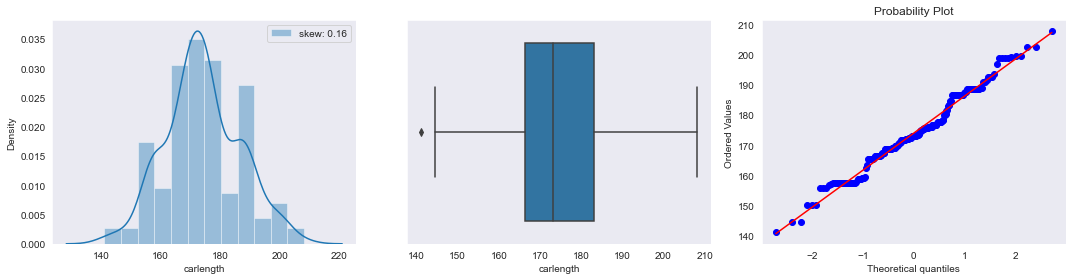

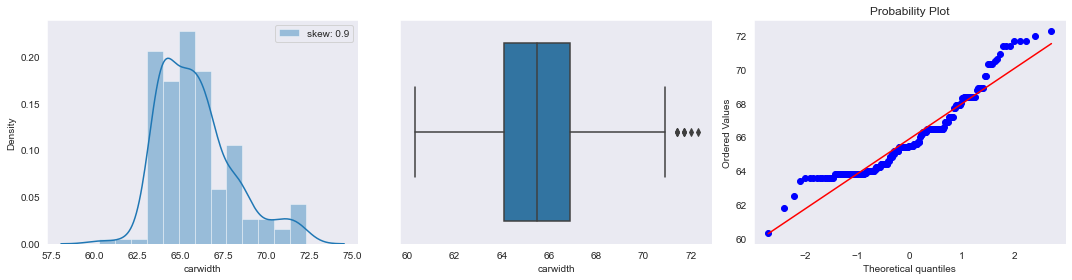

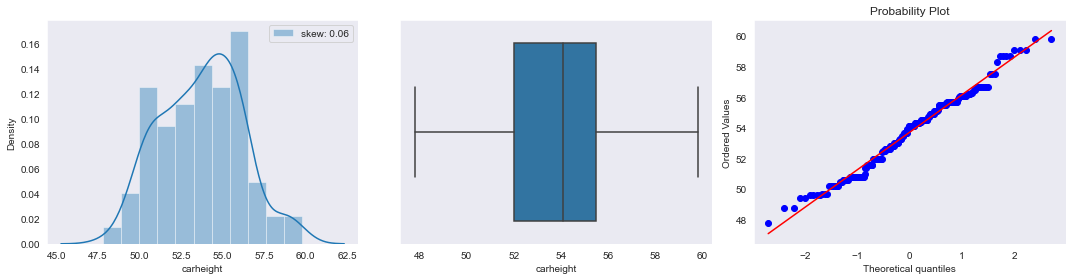

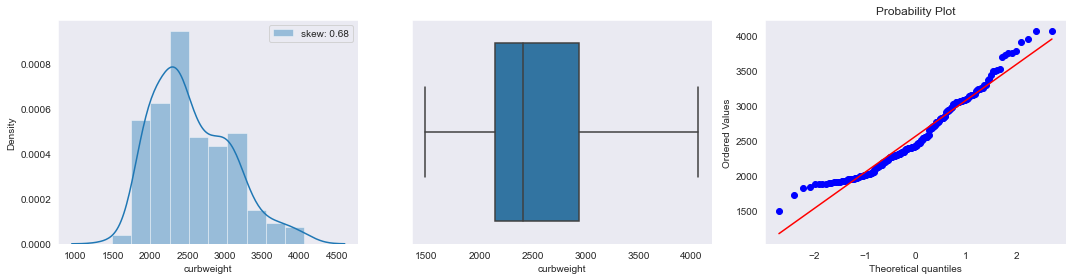

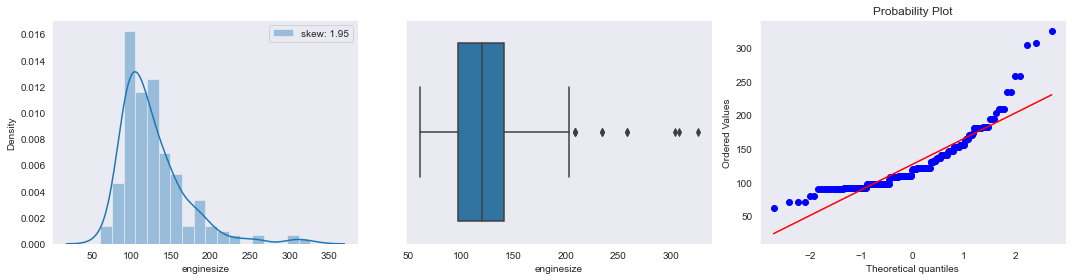

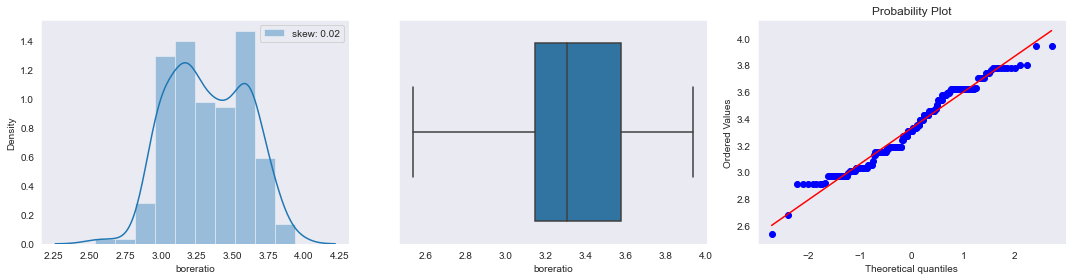

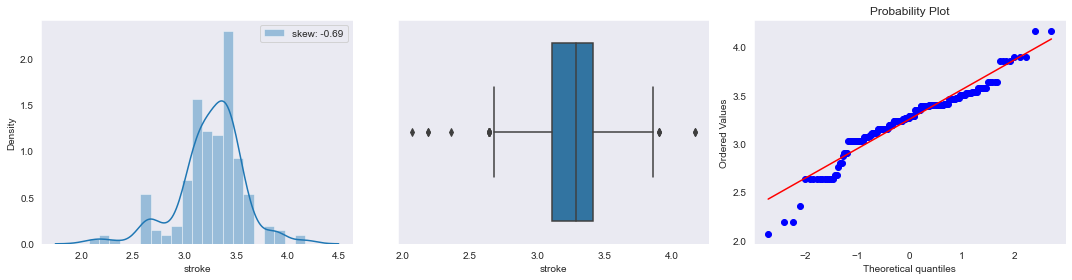

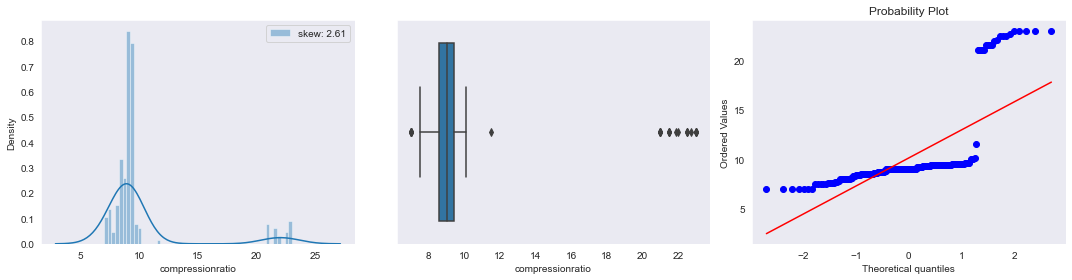

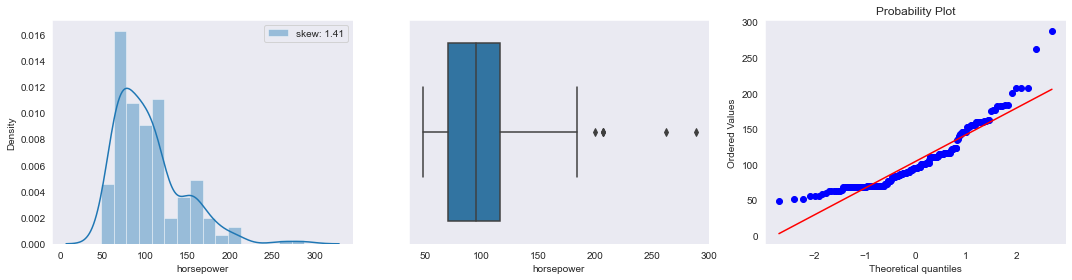

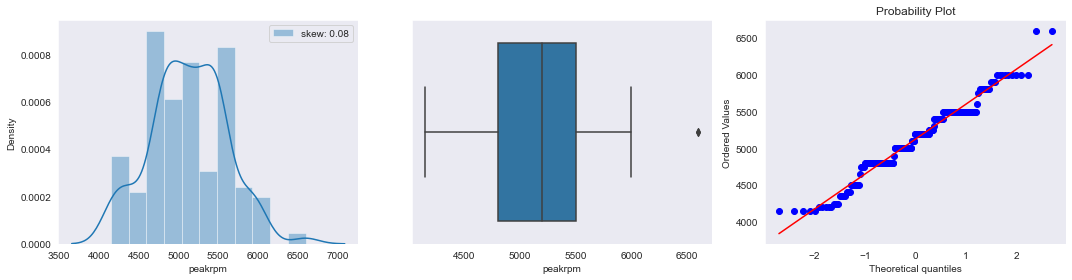

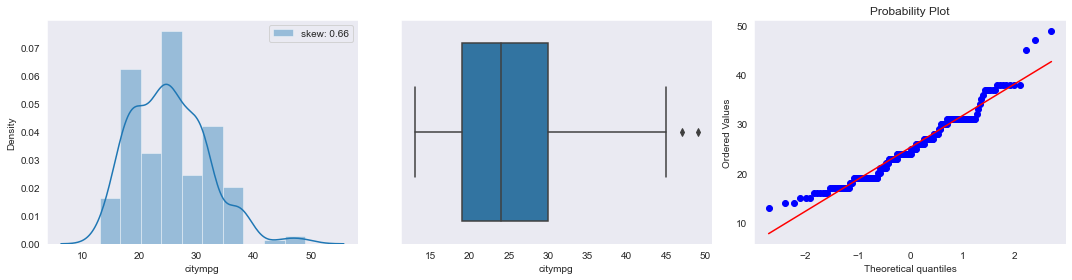

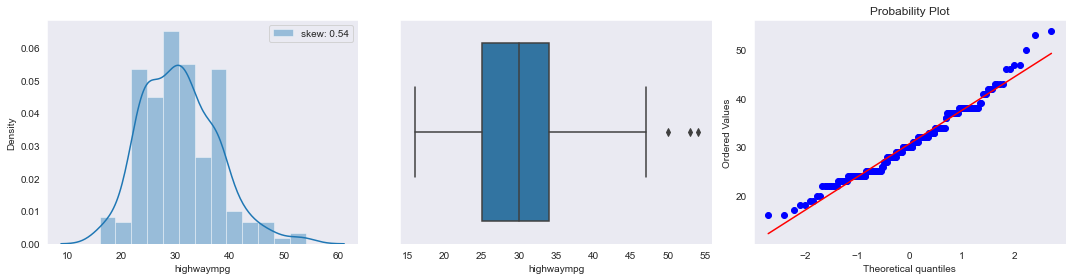

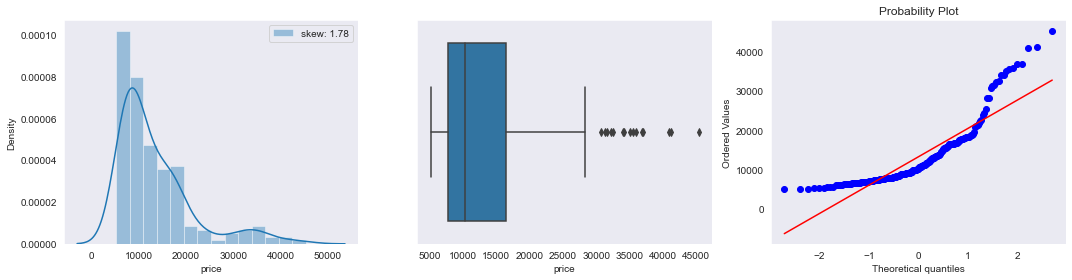

In [94]:
# Ploting graph for each varables to understand outliers

sns.set_style('dark')
for col in cont_Dataset.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(cont_Dataset[col], label="skew: " + str(np.round(cont_Dataset[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(cont_Dataset[col])
    plt.subplot(133)
    stats.probplot(cont_Dataset[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [95]:
for X in cont_Dataset.describe().columns:
    print('skewness & Max Z-Score for {} is {} and {} '.format(X,cont_Dataset[X].skew(),np.max(abs(stats.zscore(cont_Dataset[X])))))

skewness & Max Z-Score for wheelbase is 1.0502137758714858 and 3.6862252135740365 
skewness & Max Z-Score for carlength is 0.1559537713215604 and 2.766741434550069 
skewness & Max Z-Score for carwidth is 0.904003498786254 and 2.98705556854827 
skewness & Max Z-Score for carheight is 0.06312273247192804 and 2.492301615471819 
skewness & Max Z-Score for curbweight is 0.681398189052588 and 2.9079877723438705 
skewness & Max Z-Score for enginesize is 1.9476550452788108 and 4.7926789111561625 
skewness & Max Z-Score for boreratio is 0.02015641810424137 and 2.9230489468762504 
skewness & Max Z-Score for stroke is -0.6897045784233837 and 3.7893106699169268 
skewness & Max Z-Score for compressionratio is 2.6108624576151533 and 3.2449162737413837 
skewness & Max Z-Score for horsepower is 1.4053101543373119 and 4.661447798235916 
skewness & Max Z-Score for peakrpm is 0.07515872237118956 and 3.099649954424412 
skewness & Max Z-Score for citympg is 0.6637040288148164 and 3.643868220047001 
skewnes

From the above findings we can conclude that the outliers are present

In [96]:
col_sel=['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg',
         'highwaympg','price']
def iqr_capping(df1, cols, factor):
    
    for x in cols:  
        q1 = df1[x].quantile(0.25)
        q3 = df1[x].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df1[x] = np.where(df1[x]>upper_whisker, upper_whisker,
            np.where(df1[x]<lower_whisker, lower_whisker, df1[x]))


iqr_capping(cont_Dataset, col_sel, 1.5)

<AxesSubplot:>

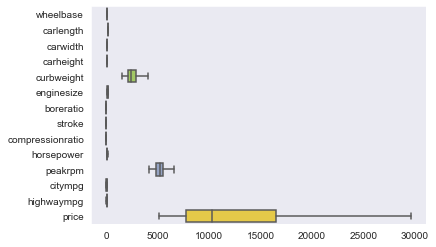

In [97]:
sns.boxplot(data=cont_Dataset, orient="h", palette="Set2")

In [98]:
# split into X and y
X = cont_Dataset.drop(['price'], axis=1)
y  = cont_Dataset['price']


In [99]:
cat_Dataset = df.select_dtypes(include=['object'])
cat_Dataset = cat_Dataset.drop(['CarName'],axis=1)
cat_Dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [100]:
Dummy_Dataset=pd.get_dummies(cat_Dataset,drop_first=True)
Dummy_Dataset.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
# concat dummy variables with X
X = pd.concat([X, Dummy_Dataset], axis=1)

In [102]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=X

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print('\t\t{}'.format(features[i]))
    print ("R-Sqr = {}\t VIF = {}".format(rsq,vif))


		carlength
R-Sqr = 0.9359387699347234	 VIF = 15.61
		carwidth
R-Sqr = 0.9106234557090642	 VIF = 11.19
		carheight
R-Sqr = 0.7639069083568761	 VIF = 4.24
		curbweight
R-Sqr = 0.9691900908328829	 VIF = 32.46
		enginesize
R-Sqr = 0.9821392182609404	 VIF = 55.99
		boreratio
R-Sqr = 0.8971930798103851	 VIF = 9.73
		stroke
R-Sqr = 0.7807494674151791	 VIF = 4.56
		compressionratio
R-Sqr = 0.8476037636937297	 VIF = 6.56
		horsepower
R-Sqr = 0.9638336374674766	 VIF = 27.65
		peakrpm
R-Sqr = 0.7373514629883897	 VIF = 3.81
		citympg
R-Sqr = 0.9712122929545235	 VIF = 34.74
		highwaympg
R-Sqr = 0.9704157699988043	 VIF = 33.8
		symboling_-1
R-Sqr = 0.887893004005649	 VIF = 8.92
		symboling_0
R-Sqr = 0.9499688940092218	 VIF = 19.99
		symboling_1
R-Sqr = 0.9485989596953228	 VIF = 19.45
		symboling_2
R-Sqr = 0.9247594153610044	 VIF = 13.29
		symboling_3
R-Sqr = 0.9311184797725737	 VIF = 14.52
		fueltype_gas
R-Sqr = 0.9998976536199907	 VIF = 9770.74
		aspiration_turbo
R-Sqr = 0.7817100958348975	 VIF = 

In [103]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(x_train,y_train)
Y_pred = lr.predict(x_test)
train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  1.0
test accuracy =  0.0
RMSE =  1.1649473767145806e-14
r2 score = 0.0


In [105]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
Y_pred = dtr.predict(x_test)
train_accuracy = dtr.score(x_train, y_train)
test_accuracy = dtr.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  1.0
test accuracy =  1.0
RMSE =  0.0
r2 score = 1.0


In [106]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)
Y_pred = rfr.predict(x_test)
train_accuracy = rfr.score(x_train, y_train)
test_accuracy = rfr.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  0.9032232394366196
test accuracy =  1.0
RMSE =  0.0
r2 score = 1.0


In [107]:
import xgboost as xg

xgr = xg.XGBRegressor(random_state=42)
xgr.fit(x_train,y_train)
Y_pred = xgr.predict(x_test)
train_accuracy = xgr.score(x_train, y_train)
test_accuracy = xgr.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  0.999998501340331
test accuracy =  0.0
RMSE =  8.560821e-06
r2 score = 0.0


In [108]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

RidgeReg=Ridge(alpha=0.1)
RidgeReg.fit(x_train,y_train)
Y_pred = RidgeReg.predict(x_test)
train_accuracy = RidgeReg.score(x_train, y_train)
test_accuracy = RidgeReg.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  0.9891288316078221
test accuracy =  0.0
RMSE =  0.0057177318791524784
r2 score = 0.0


In [109]:
LassoReg = Lasso(alpha=0.1)
LassoReg.fit(x_train,y_train)
Y_pred = LassoReg.predict(x_test)
train_accuracy = LassoReg.score(x_train, y_train)
test_accuracy = LassoReg.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  0.004114039004176617
test accuracy =  0.0
RMSE =  0.007483201996724775
r2 score = 0.0


In [110]:
EnetReg = ElasticNet(alpha = 0.1)
EnetReg.fit(x_train,y_train)
Y_pred = EnetReg.predict(x_test)
train_accuracy = EnetReg.score(x_train, y_train)
test_accuracy = EnetReg.score(x_test, y_test)

print('train accuracy = ', train_accuracy)
print('test accuracy = ', test_accuracy)
print('RMSE = ', np.sqrt(mean_squared_error(y_test,Y_pred)))
print('r2 score =',r2_score(y_test,Y_pred))

train accuracy =  0.007217469639153928
test accuracy =  0.0
RMSE =  0.008146165470530037
r2 score = 0.0


In [111]:
# import pickle

# pkl_file = "CarPricePrediction.pkl"

# with open(pkl_file, 'wb') as file:
#     pickle.dump(dtr,file)
#     pickle.dump(rfr,file)
#     pickle.dump(lr,file)

In [122]:
X.values[1]

array([8.860e+01, 1.688e+02, 6.410e+01, 4.880e+01, 2.548e+03, 1.300e+02,
       3.470e+00, 2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01,
       2.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])

In [125]:
X.values[0].reshape(1,-1).shape

(1, 47)

In [126]:
dtr.predict(X.values[0].reshape(1,-1))

array([0.])

In [131]:
import pickle

pickle.dump(dtr,open('dtrmodel.pkl','wb'))

In [132]:
pick_modl = pickle.load(open('dtrmodel.pkl','rb'))

In [133]:
pick_modl.predict(X.values[0].reshape(1,-1))

array([0.])